<a href="https://colab.research.google.com/github/micah-shull/LLMs/blob/main/LLM_026_data_preparation_for_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Key Steps in Data Preparation for LLMs

1. **Text Cleaning and Preprocessing**
   - Standardize the text (e.g., remove special characters, fix formatting).
   - Handle language-specific requirements, like stemming or lemmatization, if needed.

2. **Tokenization**
   - Tokenize text data into subwords, words, or characters, depending on the model’s requirements.
   - Add padding and truncation as needed to create consistent input sizes.

3. **Formatting for LLM-Specific Inputs**
   - Structure the data into the required input format (e.g., sequences, key-value pairs).
   - Add special tokens (e.g., `[CLS]`, `[SEP]`, or `<|endoftext|>` tokens) as required by the model.

4. **Creating Attention Masks**
   - Generate attention masks that help the model distinguish real tokens from padding tokens, essential for handling variable-length input.

5. **Converting Labels to the Correct Format**
   - Ensure labels are in the correct numerical or categorical format for classification, regression, or other tasks.

6. **Batching and Preparing for Training**
   - Organize the data into batches compatible with your LLM for efficient processing during training.



### Data Preparation for LLMs

---

#### **1. Import and Inspect IMDb Data**

   - **Objective**: Load the IMDb data from Hugging Face and understand its structure.
   - **Key Concepts**: Dataset format (splits, columns), and overall data layout.
   - **Actions**: Load the data, inspect samples, and note features like text, labels, and any additional metadata.

#### **2. Deconstruct the Data into Components**

   - **Objective**: Break down the data into its raw components, such as:
     - Text content (raw reviews).
     - Labels (sentiment labels).
   - **Key Concepts**: Understand the individual pieces of information (e.g., input text, labels) required to format data for training.

#### **3. Text Cleaning and Preprocessing**

   - **Objective**: Go over basic text preprocessing steps, even though the IMDb dataset is relatively clean.
   - **Key Concepts**: Standardizing text (lowercasing, removing special characters if necessary), optional stemming or lemmatization.
   - **Actions**: Apply text cleaning functions, understand why each step is (or isn’t) needed.

#### **4. Tokenization**

   - **Objective**: Re-tokenize the text to understand how it’s prepared for an LLM.
   - **Key Concepts**:
     - Tokenizer functions like `encode`, `decode`, `tokenize`.
     - Padding, truncation, and token length consistency.
   - **Actions**: Tokenize individual examples, explore padding/truncation options, and understand how tokenizers work with special tokens for transformers.

#### **5. Formatting Inputs for the Model**

   - **Objective**: Reassemble the tokenized data to create the full model input format.
   - **Key Concepts**:
     - Adding special tokens like `[CLS]` and `[SEP]` (or equivalents for different models).
     - Structuring data for batch processing.
   - **Actions**: Use the tokenizer’s methods to add special tokens and reformat inputs into consistent-length sequences.

#### **6. Generating Attention Masks**

   - **Objective**: Create attention masks to handle padding effectively.
   - **Key Concepts**: Purpose and format of attention masks, where `1` represents real tokens and `0` represents padding.
   - **Actions**: Generate attention masks based on tokenized sequences.

#### **7. Label Processing**

   - **Objective**: Ensure that labels are in the correct numerical format for binary classification.
   - **Key Concepts**: Converting categorical labels to integers or tensors, ensuring compatibility with LLM training requirements.
   - **Actions**: Map labels like “pos” and “neg” to numerical values, and prepare them in tensor format for PyTorch models.

#### **8. Putting It All Together**

   - **Objective**: Reassemble the cleaned, tokenized, and formatted inputs into a final dataset compatible with an LLM.
   - **Key Concepts**: Wrapping everything into a `Dataset` object (like the custom `IMDbDataset` class we previously discussed) to use for training.
   - **Actions**: Combine text, tokenized inputs, attention masks, and labels into a structured dataset ready for training.

---

### Summary

This approach will give you hands-on experience with each stage of data preparation by deconstructing and reassembling the IMDb dataset. Along the way, you’ll gain insights into the steps required to format data for an LLM, preparing you for when you want to work with your own raw datasets.



In [3]:
# !pip install transformers datasets
# !pip install python-dotenv

In [7]:
import os
import openai
from dotenv import load_dotenv
from transformers import pipeline
from datasets import load_dataset

# Load environment variables
load_dotenv('/content/huggingface_api_key.env')
api_key = os.getenv("HUGGINGFACE_API_KEY")
os.environ["HF_TOKEN"] = api_key

# Load the Amazon Reviews dataset
dataset = load_dataset("imdb")

# Inspect the structure of the dataset
print("Dataset structure:", dataset)

# Print a few examples from the training set
print("\nSample IMDb data:")
for i in range(3):
    print(f"Review {i+1}:")
    print("Text:", dataset["train"][i]["text"])
    print("Label:", "Positive" if dataset["train"][i]["label"] == 1 else "Negative")
    print("="*50)

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Sample IMDb data:
Review 1:
Text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the Unit

### HuggingFace Data Structure

The structure of the data at this point is a **`DatasetDict`** containing multiple **`Dataset`** objects for different splits (e.g., `train`, `test`, and `unsupervised`). Here’s a deeper look at this structure and its implications:

### 1. **DatasetDict Overview**

- **`DatasetDict`**: This is a specialized dictionary provided by the Hugging Face `datasets` library. It acts as a container for different data splits (`train`, `test`, etc.), making it easy to access and work with each split individually.
- **Each Key**: The keys (`train`, `test`, `unsupervised`) represent the different splits of the dataset.
- **Value (Dataset)**: Each value is a `Dataset` object containing the actual data and metadata (features, rows) for that split.

### 2. **Dataset Object Structure**

Each `Dataset` object (e.g., `dataset["train"]`) has the following structure:

- **Features**: A list of fields (or columns) in the dataset. For IMDb, these are:
  - `text`: Contains the raw movie review text.
  - `label`: An integer representing the sentiment label (1 for positive, 0 for negative).
- **Num_rows**: Shows the number of rows (or samples) in the split. Here:
  - `train` and `test` each contain 25,000 rows.
  - `unsupervised` contains 50,000 rows, although it isn’t labeled for sentiment.

Each row in the `Dataset` is a **dictionary** with the keys `text` and `label`, where:
- **text**: Stores the movie review.
- **label**: Stores the integer sentiment label.

---

### 3. Practical Example of Accessing the Data

Each row is a dictionary, so accessing an individual sample might look like this:

```python
sample = dataset["train"][0]
print(sample)  # Output: {'text': '...', 'label': 1}
```

### 4. Implications for Model Training

The **structure of the data does not need to stay as a `DatasetDict`** for model training. However, this structure is convenient for:
- **Data Management**: Separating `train` and `test` splits.
- **Accessing Rows**: Accessing samples by index and working with them in dictionaries simplifies handling individual text-label pairs.

When preparing data for the model, you’ll need to further process each row:
- **Tokenize** the text.
- **Convert labels** to tensors or compatible formats.
- **Reassemble** the data into a structure compatible with your training framework (e.g., PyTorch `Dataset` or a Hugging Face `Trainer` dataset).

### Summary

- The initial structure is a **`DatasetDict` of `Dataset` objects**.
- Each sample is a **dictionary** with `text` and `label` fields.
- For training, we will transform each sample (text and label) to meet model requirements, but the initial structure is ideal for exploration and preprocessing.

Let me know if you’d like to move on to **Step 2: Deconstructing the Data into Components** or if you have questions about this structure!

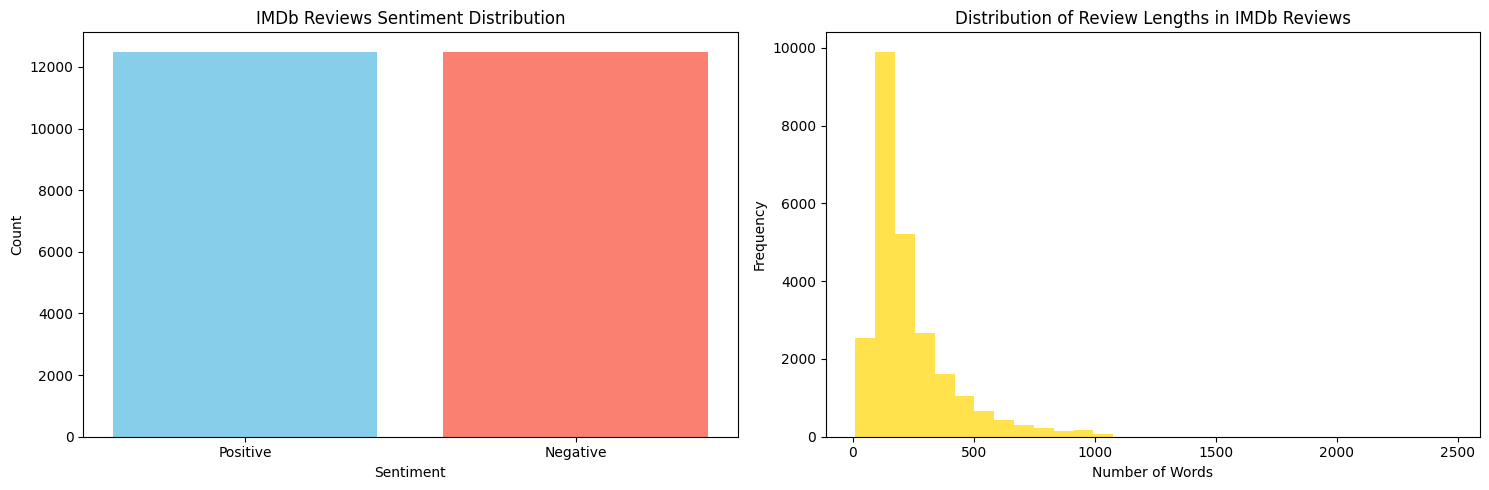

Review Length Statistics:
Mean Length: 233.7872
Max Length: 2470
Min Length: 10


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract labels and documents from the IMDb dataset
documents = dataset["train"]["text"]
labels = ["pos" if label == 1 else "neg" for label in dataset["train"]["label"]]

# Calculate and print value counts for labels
label_counts = pd.Series(labels).value_counts()

# Calculate review lengths
review_lengths = [len(review.split()) for review in documents]

# Create a 1x2 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Label Distribution
axes[0].bar(label_counts.index, label_counts.values, color=['skyblue', 'salmon'])
axes[0].set_title("IMDb Reviews Sentiment Distribution")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(label_counts.index)))
axes[0].set_xticklabels(["Positive", "Negative"])

# Plot 2: Review Length Distribution
axes[1].hist(review_lengths, bins=30, color='gold', alpha=0.7)
axes[1].set_title("Distribution of Review Lengths in IMDb Reviews")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("Frequency")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display basic statistics
print("Review Length Statistics:")
print("Mean Length:", sum(review_lengths) / len(review_lengths))
print("Max Length:", max(review_lengths))
print("Min Length:", min(review_lengths))

### Split into Samples & Labels
In this setup, the data structures we’re working with are simple lists, not dictionaries. Here’s how they break down:

#### Sample the Data
1. **Single Split Sampling**: Since we’re focusing on training data preparation, we simplified the code to sample only from `train_texts` and `train_labels`.
2. **Simplified Labels**: We’re using the raw labels (`0` or `1`) directly instead of converting them to strings (“pos” or “neg”) since this matches the original label format.

This code will provide a random 5% sample of the training data, reducing memory usage and making it easier to work within a notebook environment.



### Key Data Structures

1. **`sampled_texts`**: This is a **list of strings**.
   - Each element in `sampled_texts` is a string representing a movie review.
   - Example structure: `["I loved this movie!", "It was boring...", ...]`

2. **`sampled_labels`**: This is a **list of integers**.
   - Each element in `sampled_labels` is an integer representing the sentiment label for the corresponding review in `sampled_texts`.
   - Labels are `1` for positive and `0` for negative sentiment.
   - Example structure: `[1, 0, 1, 1, 0, ...]`

### Relationship Between `sampled_texts` and `sampled_labels`

- **Index-Based Pairing**: Each review in `sampled_texts` corresponds to a label in `sampled_labels` by index. For instance:
   - `sampled_texts[0]` has its label in `sampled_labels[0]`.
   - `sampled_texts[1]` has its label in `sampled_labels[1]`, and so on.

### Why Lists Are Useful Here

- **Simplicity**: Lists allow us to quickly inspect and manipulate the text and labels, making them ideal for exploration and data preparation.
- **Flexibility**: Later on, we can easily combine these lists into a structured format (e.g., a PyTorch `Dataset` object) for training.

In [11]:
import random

# Set the sample fraction (e.g., 5%) for a smaller subset of the data
sample_fraction = 0.05

# Extract text reviews and labels from the training set
train_texts = dataset["train"]["text"]
train_labels = dataset["train"]["label"]
train_sample_size = int(len(train_texts) * sample_fraction)

# Randomly sample reviews and labels from the training set
random.seed(42)
sample_indices = random.sample(range(len(train_texts)), train_sample_size)
sampled_texts = [train_texts[i] for i in sample_indices]
sampled_labels = [train_labels[i] for i in sample_indices]

# Print the first few examples of the sampled data to confirm the extraction
print("Sample Text Reviews:")
for i in range(3):
    print(f"Review {i+1}: {sampled_texts[i]}")

print("\nSample Labels:")
print("Labels:", sampled_labels[:3])  # Display the first few labels

Sample Text Reviews:
Review 1: Arguably this is a very good "sequel", better than the first live action film 101 Dalmatians. It has good dogs, good actors, good jokes and all right slapstick! <br /><br />Cruella DeVil, who has had some rather major therapy, is now a lover of dogs and very kind to them. Many, including Chloe Simon, owner of one of the dogs that Cruella once tried to kill, do not believe this. Others, like Kevin Shepherd (owner of 2nd Chance Dog Shelter) believe that she has changed. <br /><br />Meanwhile, Dipstick, with his mate, have given birth to three cute dalmatian puppies! Little Dipper, Domino and Oddball...<br /><br />Starring Eric Idle as Waddlesworth (the hilarious macaw), Glenn Close as Cruella herself and Gerard Depardieu as Le Pelt (another baddie, the name should give a clue), this is a good family film with excitement and lots more!! One downfall of this film is that is has a lot of painful slapstick, but not quite as excessive as the last film. This is a

### Text Cleaning and Preprocessing

In this step, we’ll:
1. **Standardize the Text**: This includes lowercasing and removing any unnecessary characters to simplify the data.
2. **Optional Cleaning**: For some applications, you might also consider removing stop words or stemming/lemmatizing words, though it’s usually less critical with large language models since they are often robust to these variations.

Since the IMDb dataset is relatively clean, we’ll focus on basic standardization.

---

### Text Cleaning and Preprocessing

Here’s a simple function to preprocess the text by lowercasing and removing any special characters that might not add value to the analysis. This function will apply to each review in `sampled_texts`.

---

### Explanation of the Cleaning Function

- **Lowercasing**: Lowercasing the text reduces variations in words (e.g., "Great" and "great" are treated the same).
- **Removing Special Characters**: The regular expression `[^a-zA-Z0-9\s.,!?']+` keeps only letters, numbers, spaces, and basic punctuation marks (like periods and commas) while removing other special characters. This can reduce noise in the data.

### Key Lessons

1. **Basic Standardization**: Lowercasing and removing special characters can help reduce variability in the text, making tokenization and model processing more consistent.
2. **Flexible Preprocessing**: The cleaning function is adaptable, so you can add or remove steps based on the specific requirements of your dataset or model.

Once you’ve inspected the cleaned text and are satisfied, let’s move on to **Step 4: Tokenization**. Let me know if you have questions about this step or if you’re ready to proceed!

In [ ]:
import re

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters (keeping only letters, numbers, and basic punctuation)
    text = re.sub(r"[^a-zA-Z0-9\s.,!?']+", "", text)
    return text

# Apply the cleaning function to each text review
cleaned_texts = [clean_text(review) for review in sampled_texts]

# Print a few examples to confirm the cleaning
print("Cleaned Sample Text Reviews:")
for i in range(3):
    print(f"Review {i+1}: {cleaned_texts[i]}")

#### What is Lemmatization ??

**Lemmatization** is a common text preprocessing step that reduces words to their base or dictionary form, known as the “lemma.” This can be helpful for standardizing words that have similar meanings but different forms (e.g., "running," "runs," and "run" all reduce to "run"). Although it’s not always essential for LLMs (which often handle these variations well), learning lemmatization is valuable for general NLP preprocessing.

Let’s go over how to implement it using **NLTK** (a popular NLP library) and **spaCy** (another common library for NLP tasks).

---

### 1. Lemmatization with NLTK

First, install NLTK if it’s not already installed:

```bash
pip install nltk
```

Then, here’s how to use NLTK for lemmatization:

```python
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')  # Download WordNet data for lemmatization
nltk.download('omw-1.4')  # Download additional resources

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Example lemmatization function using NLTK
def lemmatize_text(text):
    words = text.split()  # Split text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to each text review
lemmatized_texts = [lemmatize_text(review) for review in cleaned_texts]

# Print a few examples to see the effects of lemmatization
print("Lemmatized Sample Text Reviews:")
for i in range(3):
    print(f"Review {i+1}: {lemmatized_texts[i]}")
```

---

### 2. Lemmatization with spaCy

If you prefer, you can use spaCy, which provides more advanced linguistic processing. Install spaCy and download its English model:

```bash
pip install spacy
python -m spacy download en_core_web_sm
```

Then, here’s how to use spaCy for lemmatization:

```python
import spacy

# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")

# Example lemmatization function using spaCy
def lemmatize_text_spacy(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

# Apply lemmatization to each text review
lemmatized_texts_spacy = [lemmatize_text_spacy(review) for review in cleaned_texts]

# Print a few examples to see the effects of lemmatization
print("Lemmatized Sample Text Reviews (spaCy):")
for i in range(3):
    print(f"Review {i+1}: {lemmatized_texts_spacy[i]}")
```

---

### Key Differences Between NLTK and spaCy

- **NLTK**: Provides simple word-level lemmatization without considering the context of the word in a sentence. It’s lightweight and effective for simpler tasks.
- **spaCy**: Performs lemmatization with context, using language models to better determine the correct lemma based on sentence structure.

---

### 1. **Should You Lemmatize Before Tokenization?**
   - **Typically Not Required for LLMs**: For large language models like BERT or GPT-based models, lemmatization isn’t usually necessary. These models are trained on vast amounts of data, so they inherently learn the relationships between words, including variations in tense, pluralization, and other forms.
   - **When It Might Help**: Lemmatization can be helpful if you’re working with a simple, smaller model or with tasks where reducing vocabulary size is essential (e.g., if you want to limit the number of unique words to improve training speed).

### 2. **Impact on Model Performance**
   - **Reduced Vocabulary**: Lemmatization can reduce the vocabulary size by mapping different forms of a word (e.g., "running," "runs," "run") to a single base form. This can be beneficial if vocabulary reduction is critical.
   - **Potential Loss of Nuance**: For sentiment analysis and other nuanced tasks, lemmatization might remove information that the model could otherwise use. For example, "running" and "ran" might imply different contexts in reviews, and reducing them both to "run" could remove subtle but useful distinctions.
   - **Performance on Pre-Trained Models**: Pre-trained LLMs are trained on unaltered text, so applying lemmatization may misalign the data with the patterns learned during pre-training, which could reduce performance.

### 3. **Standard Protocol**
   - **Skip Lemmatization for Large LLMs**: The standard approach with large, pre-trained language models (like those in Hugging Face’s Transformers library) is to skip lemmatization. These models are already well-equipped to understand word relationships and meanings, so additional lemmatization usually isn’t beneficial.
   - **Consider Lemmatization for Smaller, Custom Models**: For simpler models or custom neural networks where reducing vocabulary is necessary to save memory or processing power, lemmatization might be worth considering.

---

### Summary Recommendation

For this lesson, I recommend **skipping lemmatization** before tokenization. This will align our dataset with the training data typically used for LLMs, ensuring consistency and potentially better performance. Tokenization alone will handle most of the standardization, so we’ll proceed with raw, unaltered text from here.

Exactly! For simpler models like **Logistic Regression (LogReg)**, **Naive Bayes**, or even **Support Vector Machines (SVM)**, lemmatization (and sometimes stemming) can be quite helpful. Here’s why it makes a difference with these types of models:

### Why Lemmatization Helps with Simple Models

1. **Reduced Vocabulary Size**:
   - Simpler models don’t have the capacity to handle large, complex vocabularies as effectively as large language models (LLMs).
   - Lemmatization helps by reducing the number of unique words, which can improve the model’s efficiency and reduce memory usage.

2. **Improved Signal-to-Noise Ratio**:
   - By mapping words like "running," "runs," and "run" to a common base form, lemmatization helps these models focus on the core meaning of each word, rather than getting distracted by variations.
   - This is particularly helpful for bag-of-words or term frequency-inverse document frequency (TF-IDF) approaches, where each word is treated as a distinct feature.

3. **Better Generalization**:
   - Lemmatization can improve generalization by grouping words with the same meaning into a single feature, which helps the model capture patterns more effectively.
   - For example, in sentiment analysis, grouping all forms of “happy” together strengthens the signal associated with positive sentiment.

### Example Scenario: Logistic Regression for Sentiment Analysis

When using Logistic Regression for sentiment analysis:
- **Preprocessing Steps** often include **lemmatization** or **stemming** to reduce vocabulary, alongside **tokenization**, **lowercasing**, and **removing stop words**.
- **Vectorization Techniques** like **TF-IDF** or **count vectors** benefit from a smaller, more consistent vocabulary, which makes lemmatization useful.

### Key Takeaway

Lemmatization is generally beneficial for simpler models that rely on straightforward text features, as it helps reduce vocabulary size and improves feature consistency. For large, complex models like LLMs, however, lemmatization is typically unnecessary, as these models can understand and handle word variations on their own.


#### What is Tokenization??

**Step 4: Tokenization**.

Tokenization is essential for preparing text data for a language model. In this step, we’ll use Hugging Face’s tokenizer to:
1. **Convert Text to Tokens**: Break down text into subwords or tokens that the model can process.
2. **Add Special Tokens**: Add necessary tokens like `[CLS]` (start of input) and `[SEP]` (end of segment) to structure the input for transformer models.
3. **Apply Padding and Truncation**: Ensure that all input sequences have consistent lengths by padding shorter ones and truncating longer ones.

---

### Explanation of Each Part

1. **Tokenizer Loading**:
   - We’re using `AutoTokenizer.from_pretrained("distilbert-base-uncased")` to load the tokenizer that matches our model, which ensures compatibility with the model’s vocabulary and token requirements.
   
2. **Tokenization Parameters**:
   - **`padding=True`**: Pads sequences to the length of the longest sequence in the batch.
   - **`truncation=True`**: Truncates sequences that are longer than `max_length=128`.
   - **`max_length=128`**: Sets a consistent maximum length for all sequences. This prevents excessively long reviews from slowing down training.
   - **`return_tensors="pt"`**: Converts the tokenized output into PyTorch tensors, which is the required format for most transformer models during training.

3. **Inspecting the Output**:
   - **`input_ids`**: These are the numerical representations of each token in the text. They represent the actual tokens that will be fed into the model.
   - **`attention_mask`**: Indicates which tokens are real and which are padding (`1` for real tokens, `0` for padding). The model uses this mask to ignore padding tokens during processing.

---

### Key Lessons from Tokenization

- **Alignment with Model Requirements**: Different models (e.g., BERT, GPT) have unique tokenization requirements. Hugging Face tokenizers make it easy to match these requirements.
- **Consistency in Input Length**: Padding and truncation ensure that all inputs are the same length, which is important for batch processing in training.
- **Special Tokens and Attention Masks**: These structures help the model interpret the beginning, end, and padding in each sequence, ensuring it processes data correctly.

Absolutely, that’s a great idea! Large Language Models (LLMs) like BERT, GPT, and DistilBERT are indeed types of **neural networks**, specifically **transformer-based neural networks**. Here’s a high-level overview of how these data preparation steps connect with the structure and requirements of an LLM as a neural network.

---

### Neural Networks and LLMs: The Basics

At a fundamental level, **neural networks** process numerical data, so transforming text into a numerical format is essential. **Transformers** (which are the architecture behind LLMs) are particularly good at handling sequences of data (like text) and learning the relationships between words or tokens.

To optimize their performance, LLMs require input data in a consistent, structured format. Here’s how the tokenization, padding, and special tokens help achieve that:

---

### 1. **Convert Text to Tokens**

   - **Purpose**: The model needs to process words as numbers, so we use a tokenizer to break down text into smaller pieces, like **subwords** or **tokens**. Each token is assigned an ID that the model can interpret.
   - **Relation to Neural Networks**: Tokenizing text allows the neural network to work with each word or subword as a unique feature in a sequence. It enables the model to recognize patterns in language by analyzing these tokens in context.
   - **How It Helps LLMs**: Since transformers excel at sequence-based tasks, breaking down text into tokens gives them the flexibility to learn complex relationships and dependencies between words.

### 2. **Add Special Tokens**

   - **Purpose**: Special tokens help the model understand the structure of the input. For example:
     - **[CLS]**: Marks the start of the sequence, used for tasks like classification.
     - **[SEP]**: Separates distinct segments within the input, useful in question-answering or sentence-pair tasks.
   - **Relation to Neural Networks**: Special tokens help transformers organize input sequences and focus on specific tasks, like identifying the beginning of a sentence or differentiating between question and answer segments.
   - **How It Helps LLMs**: Special tokens provide structure, ensuring that the model knows where to start interpreting the sequence and, in some cases, where one part of the input ends and another begins. These markers allow LLMs to manage complex tasks like text classification or question-answering effectively.

### 3. **Apply Padding and Truncation**

   - **Purpose**: Padding and truncation standardize the length of input sequences. Shorter sequences are **padded** to reach a common length, while longer sequences are **truncated** to avoid exceeding a maximum length (like `max_length=128`).
   - **Relation to Neural Networks**: Neural networks process data in **batches**—groups of inputs processed simultaneously for efficiency. To do this, each input in the batch must have the same length. Padding ensures that all inputs in a batch reach a consistent length, while truncation prevents overly long sequences from monopolizing memory.
   - **How It Helps LLMs**: Padding keeps inputs aligned in a batch, while **attention masks** allow the model to ignore padding during processing. Truncation ensures that memory and computation are kept manageable, making it feasible to train or fine-tune LLMs on large datasets.

### Summary of How These Steps Support LLMs as Neural Networks

- **Consistency and Efficiency**: Tokenization, padding, and truncation make the input data uniform, which is essential for efficient batch processing in neural networks.
- **Understanding Context**: Special tokens and tokenization allow LLMs to interpret language structure and relationships, enabling them to model context and meaning effectively.
- **Memory and Processing Constraints**: Padding and truncation ensure that each batch of data is manageable for the model’s memory, balancing efficiency with performance.



### Tokenizer Matching by Model Name

Each language model is typically designed with a specific **tokenizer** in mind, and the model and tokenizer must match to ensure compatibility. Here’s how you can determine which tokenizer works with which model:

---

### 1. **Tokenizer Matching by Model Name**

The easiest and most reliable way to select the correct tokenizer is to use the **same model name** when loading both the model and the tokenizer. For instance, if you’re using the Hugging Face Transformers library:

```python
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer and model with the same model name
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")
```

By specifying the model name (`"distilbert-base-uncased"` in this case) for both the tokenizer and model, you ensure that the tokenizer is compatible. Hugging Face will automatically load the correct tokenizer that aligns with the model’s architecture.

### 2. **Why Tokenizer-Model Compatibility Matters**

Each model architecture has unique requirements for:
   - **Vocabulary Size**: Different models have different vocabularies and token ID mappings.
   - **Token Types and Special Tokens**: Models like BERT use `[CLS]` and `[SEP]` tokens, while GPT-based models use `<|endoftext|>` as an end marker.
   - **Tokenization Strategy**: Some models use subword tokenization (like BERT’s WordPiece), while others use byte-pair encoding (BPE, common for GPT and RoBERTa).

Using a mismatched tokenizer can cause errors because the model may encounter unexpected token IDs, special tokens, or sequence formats.

### 3. **AutoTokenizer Handles Compatibility**

When using `AutoTokenizer` from Hugging Face, it automatically loads the appropriate tokenizer class based on the model type. Here’s how it works:
   - For **BERT-based models**, `AutoTokenizer` loads a tokenizer that uses WordPiece tokenization with `[CLS]` and `[SEP]` tokens.
   - For **GPT-based models**, it loads a tokenizer with BPE encoding and `<|endoftext|>` tokens.
   - For **Roberta** or **DistilBERT**, it loads tokenizers using their respective special tokens and encoding methods.

### 4. **Checking Model Documentation**

If you’re unsure, you can check the model’s documentation on Hugging Face or the original paper. Most documentation will specify:
   - The exact tokenizer method (e.g., WordPiece, BPE).
   - Any special tokens that need to be added.
   - Vocabulary details (size, specific tokens).

### Summary

- **Match by Name**: Using the same model name when loading both model and tokenizer is the easiest way to ensure compatibility.
- **Use AutoTokenizer**: Hugging Face’s `AutoTokenizer` automatically selects the correct tokenizer for the model type.
- **Check Documentation**: If in doubt, refer to the model’s documentation for exact tokenization requirements.



In [14]:
from transformers import AutoTokenizer

# Load the tokenizer for the model we're using (e.g., DistilBERT)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the sampled text data with padding and truncation
tokenized_texts = tokenizer(
    sampled_texts,
    padding=True,              # Pad shorter sequences
    truncation=True,           # Truncate longer sequences
    max_length=128,            # Maximum length for each sequence
    return_tensors="pt"        # Return as PyTorch tensors for model compatibility
)

# Print a few tokenized examples to inspect the results
print("Tokenized Text Sample:")
for i in range(3):
    print(f"Review {i+1}: {sampled_texts[i]}")
    print(f"Input IDs (tokens) for Review {i+1}: {tokenized_texts['input_ids'][i]}")
    print(f"Attention Mask for Review {i+1}: {tokenized_texts['attention_mask'][i]}")

Tokenized Text Sample:
Review 1: Arguably this is a very good "sequel", better than the first live action film 101 Dalmatians. It has good dogs, good actors, good jokes and all right slapstick! <br /><br />Cruella DeVil, who has had some rather major therapy, is now a lover of dogs and very kind to them. Many, including Chloe Simon, owner of one of the dogs that Cruella once tried to kill, do not believe this. Others, like Kevin Shepherd (owner of 2nd Chance Dog Shelter) believe that she has changed. <br /><br />Meanwhile, Dipstick, with his mate, have given birth to three cute dalmatian puppies! Little Dipper, Domino and Oddball...<br /><br />Starring Eric Idle as Waddlesworth (the hilarious macaw), Glenn Close as Cruella herself and Gerard Depardieu as Le Pelt (another baddie, the name should give a clue), this is a good family film with excitement and lots more!! One downfall of this film is that is has a lot of painful slapstick, but not quite as excessive as the last film. This is

### Combine Inputs

Now that we have our **tokenized inputs**, **labels**, and **attention masks** separated, the next step is to combine them into a unified format for model training.

Here’s what we’ll do next:

1. **Combine the Inputs**: Package the tokenized inputs (input IDs, attention masks) and labels into a single dataset structure.
2. **Create a Custom Dataset (Optional)**: Wrap everything in a custom dataset class, like `torch.utils.data.Dataset`, to make it compatible with PyTorch or Hugging Face’s Trainer API.

### Step 5: Combining Inputs for Training

Let’s structure the data so that each sample has its **input IDs**, **attention mask**, and **label** grouped together.

---

### Option 1: Using a Dictionary (Quick and Simple for Smaller Projects)

If you’re working with a smaller project or just testing, you can combine the inputs in a dictionary format:

```python
# Convert labels to tensor format
import torch

# Prepare labels as tensors
label_tensors = torch.tensor(sampled_labels)

# Combine inputs in a dictionary
train_data = {
    "input_ids": tokenized_texts["input_ids"],
    "attention_mask": tokenized_texts["attention_mask"],
    "labels": label_tensors
}

# Check the structure
print("Combined Data Sample:")
for key, value in train_data.items():
    print(f"{key}: {value[:3]}")
```

This dictionary format groups the tokenized data with attention masks and labels, making it easy to pass the inputs to the model for small testing scenarios.

---

### Option 2: Creating a Custom Dataset (More Scalable)

For more scalable training, especially when using `Trainer` in Hugging Face or a PyTorch DataLoader, creating a custom dataset class provides more flexibility.

```python
from torch.utils.data import Dataset

class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: self.encodings[key][idx] for key in self.encodings}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset
train_dataset = IMDbDataset(tokenized_texts, label_tensors)

# Check the structure of a sample
print("Custom Dataset Sample:")
print(train_dataset[0])  # Print the first item in the dataset
```

### Explanation of the Custom Dataset Class

- **`__init__`**: Takes in `encodings` (tokenized inputs and masks) and `labels`, storing them as class attributes.
- **`__getitem__`**: Accesses an individual sample by index, returning a dictionary of `input_ids`, `attention_mask`, and `labels`.
- **`__len__`**: Returns the total number of samples, which is required for `Dataset` objects in PyTorch.

### Key Takeaways

- **Dictionary Format**: Quick and easy for small projects.
- **Custom Dataset**: More flexible and essential for larger-scale training, especially with PyTorch’s `DataLoader` or Hugging Face’s `Trainer`.



In [15]:
# Convert labels to tensor format
import torch

# Prepare labels as tensors
label_tensors = torch.tensor(sampled_labels)

# Combine inputs in a dictionary
train_data = {
    "input_ids": tokenized_texts["input_ids"],
    "attention_mask": tokenized_texts["attention_mask"],
    "labels": label_tensors
}

# Check the structure
print("Combined Data Sample:")
for key, value in train_data.items():
    print(f"{key}: {value[:3]}")

Combined Data Sample:
input_ids: tensor([[  101, 15835,  2023,  2003,  1037,  2200,  2204,  1000,  8297,  1000,
          1010,  2488,  2084,  1996,  2034,  2444,  2895,  2143,  7886, 17488,
         18900,  7066,  1012,  2009,  2038,  2204,  6077,  1010,  2204,  5889,
          1010,  2204, 13198,  1998,  2035,  2157, 14308, 21354,   999,  1026,
          7987,  1013,  1028,  1026,  7987,  1013,  1028, 10311,  2721,  6548,
          1010,  2040,  2038,  2018,  2070,  2738,  2350,  7242,  1010,  2003,
          2085,  1037,  7089,  1997,  6077,  1998,  2200,  2785,  2000,  2068,
          1012,  2116,  1010,  2164,  9318,  4079,  1010,  3954,  1997,  2028,
          1997,  1996,  6077,  2008, 10311,  2721,  2320,  2699,  2000,  3102,
          1010,  2079,  2025,  2903,  2023,  1012,  2500,  1010,  2066,  4901,
         11133,  1006,  3954,  1997,  3416,  3382,  3899,  7713,  1007,  2903,
          2008,  2016,  2038,  2904,  1012,  1026,  7987,  1013,  1028,  1026,
          7987,  10

Using the simple dictionary approach, `train_data` will be a dictionary where each key corresponds to one type of data, and each value is a tensor containing all samples for that data type. Here’s a breakdown of what this dictionary will look like:

### Structure of `train_data`

```python
train_data = {
    "input_ids": tokenized_texts["input_ids"],       # Token IDs for each sample
    "attention_mask": tokenized_texts["attention_mask"],  # Attention masks indicating real tokens vs padding
    "labels": label_tensors                          # Labels for each sample (0 or 1 for sentiment)
}
```

### Data Types and Shapes

- **`"input_ids"`**: Tensor of token IDs with a shape of `(num_samples, max_length)`.
  - Each row in `input_ids` is a sequence of token IDs representing a text review.
  
- **`"attention_mask"`**: Tensor with a shape of `(num_samples, max_length)`.
  - Each row in `attention_mask` is a binary sequence (1s and 0s), where `1` represents real tokens, and `0` represents padding tokens.
  
- **`"labels"`**: Tensor with a shape of `(num_samples,)`.
  - Each entry in `labels` is the sentiment label for the corresponding review, where `1` represents positive sentiment and `0` represents negative.

### Example Output for `train_data`

If you printed `train_data`, it would look something like this:

```python
{
  "input_ids": tensor([[101, 2057, 2293, ...], [101, 2009, 2001, ...], ...]),
  "attention_mask": tensor([[1, 1, 1, ...], [1, 1, 1, ...], ...]),
  "labels": tensor([1, 0, 1, ...])
}
```

Each entry (e.g., `input_ids`, `attention_mask`, `labels`) represents all samples in the dataset.

### Using `train_data` for Training

Now that we have `train_data` structured this way, it’s ready to be fed into a model for training. We can pass each element in `train_data` directly to a transformer model or training loop, making it very efficient for batch processing.

Great questions! Let’s clarify these terms, as it can get a bit confusing with the different shapes involved. Here’s a breakdown of **`num_samples`**, **`max_length`**, and the meaning of each **sample** in the context of our dataset.

---

### Key Concepts

1. **`num_samples`**:
   - This represents the **total number of reviews** in the dataset.
   - In your `train_data` dictionary, `num_samples` is the number of entries in `sampled_texts`—so if you sampled 5% of a 25,000-sample training dataset, `num_samples` would be about 1,250.
   - Each sample in this context is a **single text review** with its corresponding token IDs, attention mask, and label.

2. **`max_length`**:
   - This is the **maximum token length** for each review, defining how long each sequence can be. If a review has fewer tokens than `max_length`, we add **padding** to reach this length. If it’s longer, we **truncate** it to fit.
   - For example, if `max_length=128`, every tokenized review will have 128 tokens, regardless of its original length, due to padding and truncation.
   - **`attention_mask`** uses `max_length` to ensure each review sequence has a uniform length, marking real tokens with `1` and padding tokens with `0`.

---

### Tensor Shapes in `train_data`

Let’s relate these definitions back to the shapes in `train_data`:

- **`"input_ids"` Tensor**: Has a shape of `(num_samples, max_length)`.
  - **Example Shape**: `(1250, 128)` if we sampled 1,250 reviews and set `max_length=128`.
  - Each row in `input_ids` represents the tokenized form of a single review, with each entry in the row representing a token ID. So, every row is a **sample** (one review) padded or truncated to `max_length`.

- **`"attention_mask"` Tensor**: Also has a shape of `(num_samples, max_length)`.
  - **Example Shape**: `(1250, 128)` for 1,250 reviews with padding/truncation to 128 tokens.
  - Each row here corresponds to a single review, with `1` for real tokens and `0` for padding tokens, enabling the model to focus only on real tokens.

- **`"labels"` Tensor**: Has a shape of `(num_samples,)`.
  - **Example Shape**: `(1250,)`, where each entry represents the sentiment label (0 or 1) for a single review.
  - This is a one-dimensional tensor since each label is a single integer value representing the sentiment for each sample.

---

### Summary: What Is a "Sample"?

- **Each Sample = One Review**:
  - Each sample in `train_data` is a single movie review and its associated data (tokens, mask, and label).
  - A **dataset** (like `train_data`) contains multiple samples.

In this structure:
- **`num_samples`** is the number of reviews.
- **`max_length`** is the fixed length of each review’s token sequence after padding and truncation.

Each sample (a single review) isn’t considered a dataset on its own, but it forms part of the larger dataset, `train_data`, which contains all samples.


## Training the Model

Now, we’ll use Hugging Face’s `Trainer` API to set up and run the training process, which simplifies the process of training and evaluating transformer models. Since we already have `train_data` organized with input IDs, attention masks, and labels, we’re in a good position to get started with training.

#### Steps in This Phase:
1. **Define Training Arguments**: Set parameters like batch size, learning rate, and the number of training epochs.
2. **Initialize the Trainer**: Set up the model and data with the Hugging Face `Trainer`.
3. **Train the Model**: Run the training loop and periodically evaluate the model.

---

### Explanation of the Training Steps

- **Training Arguments**: Control aspects of training like batch size, learning rate, and evaluation frequency.
- **Trainer**: Simplifies the training process by managing data loading, batch processing, and logging automatically.
- **Epoch-Based Evaluation**: Evaluating at each epoch helps monitor performance and ensures the model doesn’t overfit.



### 1. Define Training Arguments

We’ll start by setting the training arguments. Here’s some code to define these:

In [18]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",            # Output directory for model predictions and checkpoints
    eval_strategy="epoch",       # Evaluate at the end of each epoch
    per_device_train_batch_size=8,     # Batch size for training
    per_device_eval_batch_size=8,      # Batch size for evaluation
    num_train_epochs=1,                # Number of training epochs
    weight_decay=0.01,                 # Weight decay for regularization
    logging_dir="./logs",              # Directory for storing logs
    logging_steps=10,                  # Log every 10 steps
    report_to="none"                    # Disables W&B logging
)

### 2. Initialize the Trainer

Next, we initialize the `Trainer`, specifying the model, training arguments, and dataset. For simplicity, let’s also create a validation set from a portion of `train_data` to monitor the model’s performance.

In [20]:
train_data["input_ids"].shape

torch.Size([1250, 128])

In [23]:
from transformers import Trainer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_size = int(0.8 * len(train_data["input_ids"]))
val_size = len(train_data["input_ids"]) - train_size

# Separate training and validation data
train_dataset = {
    "input_ids": train_data["input_ids"][:train_size],
    "attention_mask": train_data["attention_mask"][:train_size],
    "labels": train_data["labels"][:train_size],
}
val_dataset = {
    "input_ids": train_data["input_ids"][train_size:],
    "attention_mask": train_data["attention_mask"][train_size:],
    "labels": train_data["labels"][train_size:],
}

# Initialize the model
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 3. Train the Model

This will start the training process, where the model learns from `train_dataset`, and `Trainer` will also evaluate on `val_dataset` at the end of each epoch (because of `evaluation_strategy="epoch"`).

In [24]:
import time

# Start the timer
start_time = time.time()

# Start training
trainer.train()

# End the timer
end_time = time.time()

# Calculate and print the duration in minutes
duration = (end_time - start_time) / 60
print(f"Tokenization completed in {duration:.2f} minutes.")

KeyError: 0

This `KeyError` is likely due to the way we structured `train_dataset` and `val_dataset` as dictionaries rather than as PyTorch datasets or Hugging Face `Dataset` objects. The `Trainer` expects datasets to follow certain formats to retrieve samples by index.

To resolve this, let’s modify `train_dataset` and `val_dataset` to work with `Trainer`. Since we’re using dictionaries to hold our data, we can either convert them into a `Dataset` object or switch to using a `DatasetDict` from Hugging Face’s `datasets` library.

### Wrap Data in a Custom Dataset Class

Here’s how to wrap `train_data` and `val_data` in a custom dataset class compatible with `Trainer`:

```python
from torch.utils.data import Dataset

class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Retrieves data by index as expected by Trainer
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Split labels as tensors for training and validation sets
train_labels = label_tensors[:train_size]
val_labels = label_tensors[train_size:]

# Initialize datasets with the IMDbDataset class
train_dataset = IMDbDataset(
    encodings={
        "input_ids": train_data["input_ids"][:train_size],
        "attention_mask": train_data["attention_mask"][:train_size],
    },
    labels=train_labels
)
val_dataset = IMDbDataset(
    encodings={
        "input_ids": train_data["input_ids"][train_size:],
        "attention_mask": train_data["attention_mask"][train_size:],
    },
    labels=val_labels
)
```

### Explanation of Changes

- **Custom Dataset Class**: `IMDbDataset` allows `Trainer` to index data as expected.
- **`__getitem__` Method**: Retrieves each sample by index and packages it in a dictionary.
- **Consistent Format**: Wrapping `train_data` and `val_data` in `IMDbDataset` allows `Trainer` to handle the data correctly.

This should resolve the `KeyError`. Let me know if you encounter further issues or if you’re ready to proceed with model evaluation after training!

The Hugging Face `Trainer` requires that the datasets (`train_dataset` and `eval_dataset`) be in a format that allows it to retrieve samples by index, which a simple dictionary doesn’t support. **Using a PyTorch `Dataset`** or a Hugging Face `Dataset` provides that indexing capability and enables `Trainer` to access each sample in the way it expects.

### Why a Simple Dictionary Won't Work

- **Indexing Requirement**: The `Trainer` retrieves individual samples by calling the dataset with an index (e.g., `dataset[0]`), which dictionaries don’t support.
- **Batch Processing**: To create batches, `Trainer` needs to know how to retrieve sequences by their indices and stack them together. Dictionaries don’t provide this functionality, but `Dataset` classes do.

### Solution Recap

By wrapping our data in a custom PyTorch `Dataset` class, such as the `IMDbDataset` we defined, we give the `Trainer` the ability to access samples by index. This allows it to correctly retrieve, batch, and process data during training and evaluation.



In [28]:
# Split the data into training and validation sets
train_size = int(0.8 * len(train_data["input_ids"]))
val_size = len(train_data["input_ids"]) - train_size

# Separate training and validation data
train_dataset = {
    "input_ids": train_data["input_ids"][:train_size],
    "attention_mask": train_data["attention_mask"][:train_size],
    "labels": train_data["labels"][:train_size],
}
val_dataset = {
    "input_ids": train_data["input_ids"][train_size:],
    "attention_mask": train_data["attention_mask"][train_size:],
    "labels": train_data["labels"][train_size:],
}

# Print a sample from the dictionary-based dataset
print("Sample from dictionary-based train_dataset:")
print({
    "input_ids": train_dataset["input_ids"][0],
    "attention_mask": train_dataset["attention_mask"][0],
    "labels": train_dataset["labels"][0]
})


Sample from dictionary-based train_dataset:
{'input_ids': tensor([  101, 15835,  2023,  2003,  1037,  2200,  2204,  1000,  8297,  1000,
         1010,  2488,  2084,  1996,  2034,  2444,  2895,  2143,  7886, 17488,
        18900,  7066,  1012,  2009,  2038,  2204,  6077,  1010,  2204,  5889,
         1010,  2204, 13198,  1998,  2035,  2157, 14308, 21354,   999,  1026,
         7987,  1013,  1028,  1026,  7987,  1013,  1028, 10311,  2721,  6548,
         1010,  2040,  2038,  2018,  2070,  2738,  2350,  7242,  1010,  2003,
         2085,  1037,  7089,  1997,  6077,  1998,  2200,  2785,  2000,  2068,
         1012,  2116,  1010,  2164,  9318,  4079,  1010,  3954,  1997,  2028,
         1997,  1996,  6077,  2008, 10311,  2721,  2320,  2699,  2000,  3102,
         1010,  2079,  2025,  2903,  2023,  1012,  2500,  1010,  2066,  4901,
        11133,  1006,  3954,  1997,  3416,  3382,  3899,  7713,  1007,  2903,
         2008,  2016,  2038,  2904,  1012,  1026,  7987,  1013,  1028,  1026,
      

In [29]:
from torch.utils.data import Dataset

class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Retrieves data by index as expected by Trainer
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Split labels as tensors for training and validation sets
train_labels = label_tensors[:train_size]
val_labels = label_tensors[train_size:]

# Initialize datasets with the IMDbDataset class
train_dataset = IMDbDataset(
    encodings={
        "input_ids": train_data["input_ids"][:train_size],
        "attention_mask": train_data["attention_mask"][:train_size],
    },
    labels=train_labels
)
val_dataset = IMDbDataset(
    encodings={
        "input_ids": train_data["input_ids"][train_size:],
        "attention_mask": train_data["attention_mask"][train_size:],
    },
    labels=val_labels
)

# Print a sample from the train_dataset
print("Sample from train_dataset:")
print(train_dataset[0])  # Print the first item in the dataset


Sample from train_dataset:
{'input_ids': tensor([  101, 15835,  2023,  2003,  1037,  2200,  2204,  1000,  8297,  1000,
         1010,  2488,  2084,  1996,  2034,  2444,  2895,  2143,  7886, 17488,
        18900,  7066,  1012,  2009,  2038,  2204,  6077,  1010,  2204,  5889,
         1010,  2204, 13198,  1998,  2035,  2157, 14308, 21354,   999,  1026,
         7987,  1013,  1028,  1026,  7987,  1013,  1028, 10311,  2721,  6548,
         1010,  2040,  2038,  2018,  2070,  2738,  2350,  7242,  1010,  2003,
         2085,  1037,  7089,  1997,  6077,  1998,  2200,  2785,  2000,  2068,
         1012,  2116,  1010,  2164,  9318,  4079,  1010,  3954,  1997,  2028,
         1997,  1996,  6077,  2008, 10311,  2721,  2320,  2699,  2000,  3102,
         1010,  2079,  2025,  2903,  2023,  1012,  2500,  1010,  2066,  4901,
        11133,  1006,  3954,  1997,  3416,  3382,  3899,  7713,  1007,  2903,
         2008,  2016,  2038,  2904,  1012,  1026,  7987,  1013,  1028,  1026,
         7987,  1013,  

Let’s compare the two formats and understand why the `Trainer` requires the dataset to be in the `Dataset` class format rather than a simple dictionary.

### Dictionary Dataset Structure

In the dictionary version (`train_dataset` and `val_dataset` as dictionaries), we’re just slicing arrays from `train_data`. Here’s what a sample from the **dictionary-based dataset** would look like if we print the first few values for each key:

```python
# Print a sample from the dictionary-based dataset
print("Sample from dictionary-based train_dataset:")
print({
    "input_ids": train_dataset["input_ids"][0],
    "attention_mask": train_dataset["attention_mask"][0],
    "labels": train_dataset["labels"][0]
})
```

### Expected Output of Dictionary-Based Sample

The output will show each part of the data separately, but it doesn’t group them into individual samples, which is the main difference:

```python
Sample from dictionary-based train_dataset:
{
    'input_ids': tensor([101, 1045, 2293, ..., 102, 0, 0]),
    'attention_mask': tensor([1, 1, 1, ..., 0, 0, 0]),
    'labels': tensor(1)
}
```

This format is similar in structure to the sample from the `IMDbDataset` class, but the dictionary itself doesn’t have a method to retrieve individual samples by index, nor does it group each sample as a dictionary. This structure stores each type of data separately as lists of tensors, rather than creating a "sample-by-sample" structure.

---

### Key Differences Between the Dictionary and the `IMDbDataset`

1. **Index-Based Access**:
   - With a dictionary, accessing individual samples requires slicing manually, e.g., `train_dataset["input_ids"][0]`, which doesn’t group each sample’s elements together.
   - With `IMDbDataset`, each sample (one review) is a cohesive dictionary, accessible by `train_dataset[0]`, which retrieves the `input_ids`, `attention_mask`, and `labels` for a single sample.

2. **Compatibility with `Trainer`**:
   - The `Trainer` requires each sample to be a dictionary containing all necessary inputs (`input_ids`, `attention_mask`, and `labels`), which it expects to access by index.
   - Dictionaries don’t provide this structure, while the `IMDbDataset` class does.

3. **Batch Processing**:
   - When using `Trainer`, batch processing relies on each sample being an individual dictionary with its data grouped together. This is facilitated by the `Dataset` class, but not by a dictionary.

### Summary

The dictionary-based dataset doesn’t group individual samples and lacks index-based access, which makes it incompatible with `Trainer`. The `IMDbDataset` class format, on the other hand, groups each review as an individual sample with index access, aligning it with the `Trainer` requirements.



In [30]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Start the timer
start_time = time.time()

# Start training
trainer.train()

# End the timer
end_time = time.time()

# Calculate and print the duration in minutes
duration = (end_time - start_time) / 60
print(f"Tokenization completed in {duration:.2f} minutes.")

Epoch,Training Loss,Validation Loss
1,0.499200,0.374737


Tokenization completed in 14.87 minutes.


### Evaluate the Model on the Test Set

First, we’ll use `trainer.evaluate()` to get evaluation metrics on the validation set (or test set if we split one out).

This will give you basic metrics like accuracy and loss. However, for a more detailed report, let’s use `sklearn.metrics.classification_report` to get a full breakdown.

### Generate a Classification Report

To generate the classification report, we need the model’s predictions and the true labels for the validation/test set.
---

### Explanation of Each Part

1. **`trainer.evaluate()`**: Provides basic evaluation metrics, like loss and accuracy, on the specified dataset.
2. **`trainer.predict()`**: Runs inference on `val_dataset` to get raw predictions.
3. **`np.argmax`**: Converts the raw logits (output scores) to class labels by taking the index of the highest score for each sample.
4. **`classification_report`**: Generates precision, recall, and F1 scores for each class (positive and negative sentiment).

The classification report will give you insights into the model’s performance across these metrics, helping you assess how well it handles each class individually.



In [31]:
# Evaluate the model on the validation set
eval_results = trainer.evaluate()

# Print the evaluation results
print("Evaluation Results:", eval_results)

Evaluation Results: {'eval_loss': 0.3747371733188629, 'eval_runtime': 54.5796, 'eval_samples_per_second': 4.58, 'eval_steps_per_second': 0.586, 'epoch': 1.0}


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions on the validation/test set
predictions = trainer.predict(val_dataset)
preds = np.argmax(predictions.predictions, axis=1)  # Convert logits to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(val_dataset["labels"], preds, target_names=["Negative", "Positive"]))